# DTSC670: Foundations of Machine Learning Models

## Assignment 3: Multiple Linear Regression

#### Name:

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details
The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem. 

The provided data has been generated from a simple linear model, but some random noise has been added. Your goal is to perform multivariate ordinary least squares linear regression to determine the Best Linear Unbiased Estimators (BLUE) for the model (that is, you must calculate the model parameters for a linear regression model).  There will be some irreducible error due to the noise that was injected into the data, therefore we will never be able to exactly recover the "true model parameters".  However, the optimal model parameters computed via the linear regression analysis are sufficiently accurate that you will be able to infer the true model parameters for yourslef!

Here are the steps you will take:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [2]:
import pandas as pd

fileName = "MultipleLinearRegression.csv"
data = pd.read_csv('MultipleLinearRegression.csv') #importing data from the given file
data.head() #displying the 5 first rows

,x,y,z
0,8.340440,9.588740,209.008524
1,14.406490,13.648816,325.449818
2,0.002287,0.590582,1.651778
3,6.046651,6.393511,141.464904
4,2.935118,4.302151,83.204506


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

In [3]:
# In order to streamline future manipulations, we individually rename each column of the dataset.
xdata = data['x'] 
ydata = data['y']
zdata = data['z']

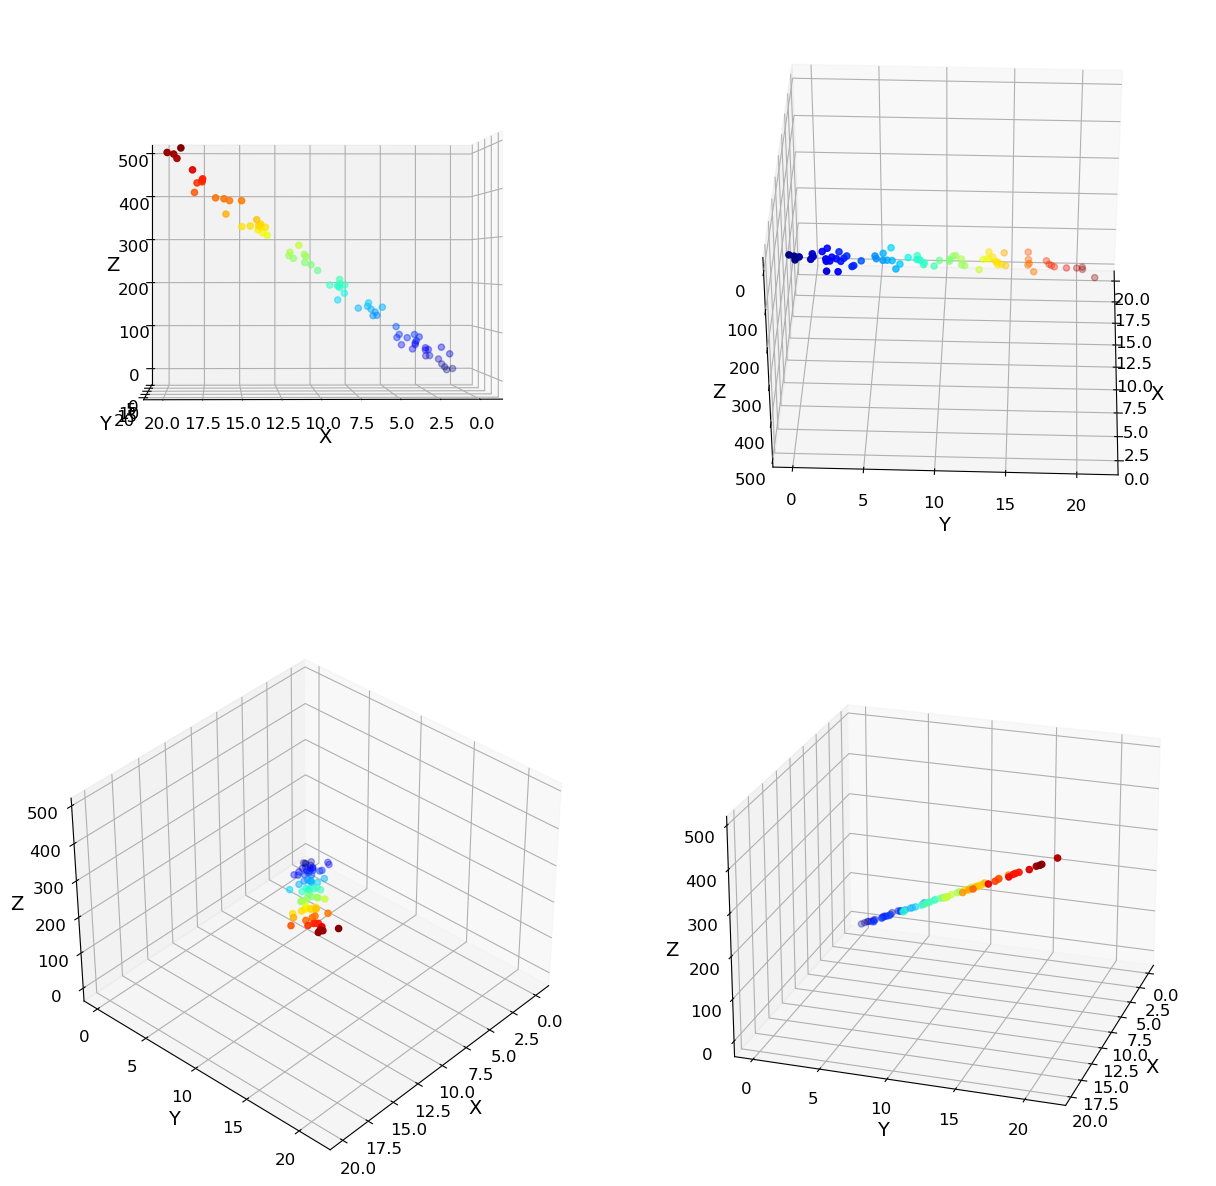

In [4]:
#%matplotlib tk # allow us to generate an picture of our work
#%matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(0,88)

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(-144,-2)

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(37,42)

ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.scatter3D(xdata, ydata, zdata, c=xdata, cmap='jet')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.view_init(23,18)



# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response. 

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [5]:
features = data.drop(['z'], axis=1) # We have categorized X, Y, and Z as features and responses, respectively.
response = data['z']

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(features, response) 
# We use LinearRegression from sklearn.linear_model to generate the coefficients and intercept values for the model based on the features and responses. 

print("Model Coefficients: ", model.coef_)
print("Model Intercept : ", model.intercept_)

Model Coefficients:  [ 8.02602396 15.95639323]
Model Intercept :  -8.632876775060708


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.  You must use `x_fit` and `y_fit` as features to be passed together as a DataFrame to the model's `predict()` method, which will return `z_fit` as determined by the above equation.  Once you obtain `z_fit`, you are ready to plot the regression line by plotting it against `x_fit` and `y_fit`.

In [6]:
# Plot Curve Fit
x_fit = np.linspace(0,21,1000)
y_fit = x_fit

# We convert x_fit and y_fit to pandas series x and y
x = pd.Series(x_fit) 
y = pd.Series(y_fit)

# We create a dictionary from both series
dct = {
    'x':x,
    'y':y
    }

# We create a pandas dataframe from the dictionary...
# It's kind of too much but as long at I kicked the error message out my code I so happy hahaha
xy = pd.DataFrame(dct)

# Now, we can fit the model predict with a combine dataframe of x_fit and y_fit 
z_fit = model.predict(xy)

Recreate the first image, but plot the line of best fit in each of the subplots as well.

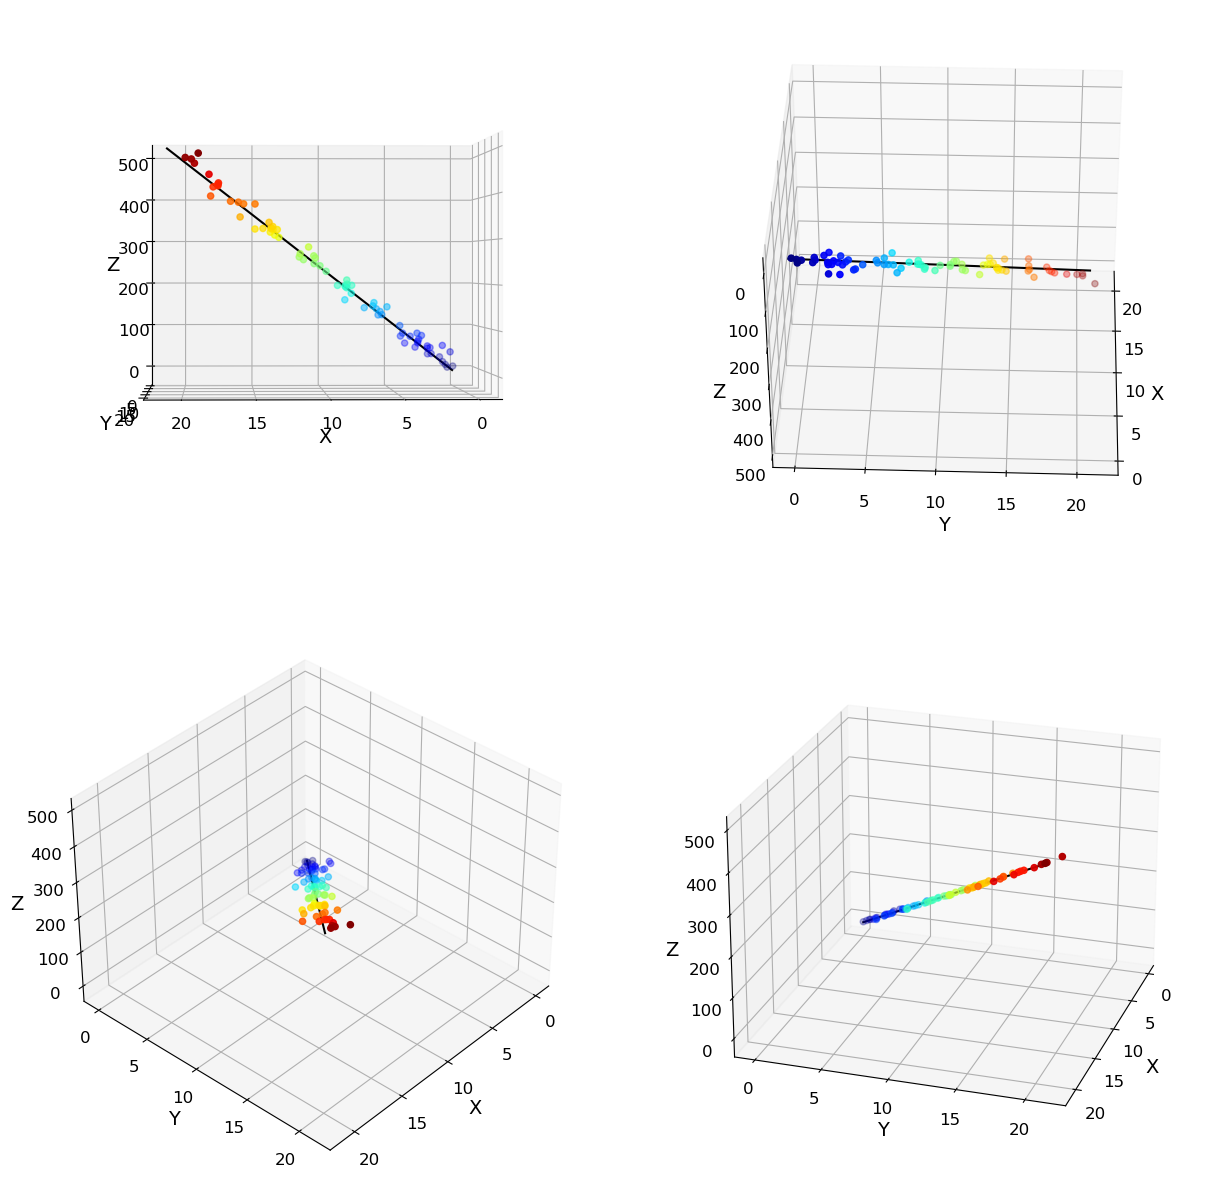

In [7]:
#%matplotlib tk
#%matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2,2,1, projection='3d')

ax1.plot3D(x_fit, y_fit, z_fit, 'black')
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet') #this line contains information of the line of fitness for ax1
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(0,88)

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.plot3D(x_fit, y_fit, z_fit, 'black') # this line contains information of the line of fitness for ax2
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(-144,-2)

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.plot3D(x_fit, y_fit, z_fit, 'black') #this line contains information of the line of fitness for ax3
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(37,42)

ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.plot3D(x_fit, y_fit, z_fit, 'black') #this line contains information of the line of fitness for ax4
ax4.scatter3D(xdata, ydata, zdata, c=xdata, cmap='jet')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.view_init(23,18)


# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters. 

The true model parameters that I selected are <b>integer values</b>. Given this information, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value. You may "hard-code" these values into the below print statements.

In [8]:
print("True Model Coefficients: ", np.round(model.intercept_))
print("True Model Intercept : ", np.round(model.coef_))

True Model Coefficients:  -9.0
True Model Intercept :  [ 8. 16.]
